In [39]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns
sns.set()
pd.options.display.max_columns = 999

Reading Dataset

In [40]:
data = pd.read_csv('/workspaces/Python/BankChurners.csv')
data.shape
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [41]:
data['CLIENTNUM'].nunique()

10127

In [42]:
data.drop_duplicates(inplace=True)

In [43]:
data['CLIENTNUM'].nunique()

10127

Subsetting data #the unnecessary columns can be removed

In [44]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [45]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [46]:
data.shape

(10127, 21)

Datatypes

In [47]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Missing values

In [48]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

to fill in missing values
#data['Education_Level'] = data['Education_Level'].fillna("unknown")

Data Transformation

In [49]:
#binning of ages
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())

26
73


In [50]:
bins = [25,30,40,50,60,70,80]
labels = ['20s','30s','40s','50s','60s','70s'] # labels = no.of bins - 1
data['Customer_age_bins'] = pd.cut(data['Customer_Age'], bins=bins,labels=labels,include_lowest = True,right = False)

In [51]:
data[data['Customer_Age']==30]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_age_bins
789,754654383,Existing Customer,30,M,2,High School,Married,Less than $40K,Blue,23,4,2,0,2997.0,1393,1604.0,1.120,1577,35,0.522,0.465,30s
803,711748983,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,17,3,3,2,7906.0,1631,6275.0,0.889,1946,45,0.552,0.206,30s
890,779149683,Existing Customer,30,F,0,Graduate,Divorced,Unknown,Blue,13,5,1,2,7772.0,1890,5882.0,0.754,2585,75,0.829,0.243,30s
939,772375533,Existing Customer,30,M,1,Graduate,Married,$80K - $120K,Blue,19,5,3,2,9959.0,2377,7582.0,1.100,1560,39,0.696,0.239,30s
974,714131058,Existing Customer,30,M,0,Graduate,Unknown,$60K - $80K,Blue,36,3,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,715923408,Existing Customer,30,F,0,College,Married,Less than $40K,Blue,19,4,2,3,4184.0,1254,2930.0,0.549,14999,110,0.719,0.300,30s
10004,764316708,Existing Customer,30,F,1,High School,Single,Less than $40K,Blue,23,3,2,2,3955.0,2352,1603.0,0.779,16423,109,0.758,0.595,30s
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,30s
10055,710066133,Attrited Customer,30,M,0,Graduate,Single,Less than $40K,Silver,36,4,3,3,12833.0,0,12833.0,0.853,9619,75,0.786,0.000,30s


Exploratory data analysis

In [52]:
# Sanity check that 16% is the attrition
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [53]:
print(round((data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0])*100,2), "% of attritited customers")

16.07 % of attritited customers


In [54]:
#statistics measured by describe() function

data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [55]:
print("Average credit limit is", round(np.mean(data['Credit_Limit']),2) ," and median is ", round(np.median(data['Credit_Limit']),2))

Average credit limit is 8631.95  and median is  4549.0


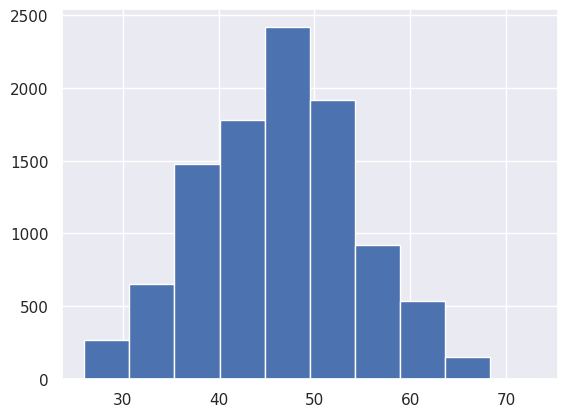

In [56]:
#distributions - histograms
import matplotlib.pyplot as plt
plt.hist(data['Customer_Age']);


(array([ 188.,  278.,  546., 1208., 1265., 3485., 1515.,  825.,  479.,
         338.]),
 array([13. , 17.3, 21.6, 25.9, 30.2, 34.5, 38.8, 43.1, 47.4, 51.7, 56. ]),
 <BarContainer object of 10 artists>)

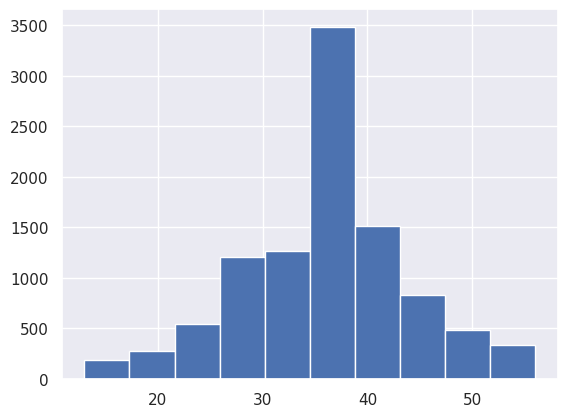

In [57]:
plt.hist(data['Months_on_book'])

Text(0.5, 0, 'Credit Limit')

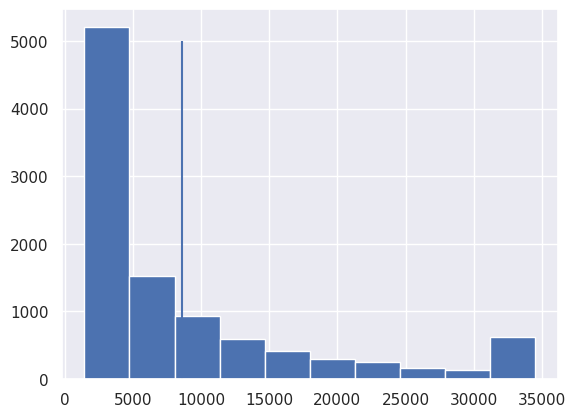

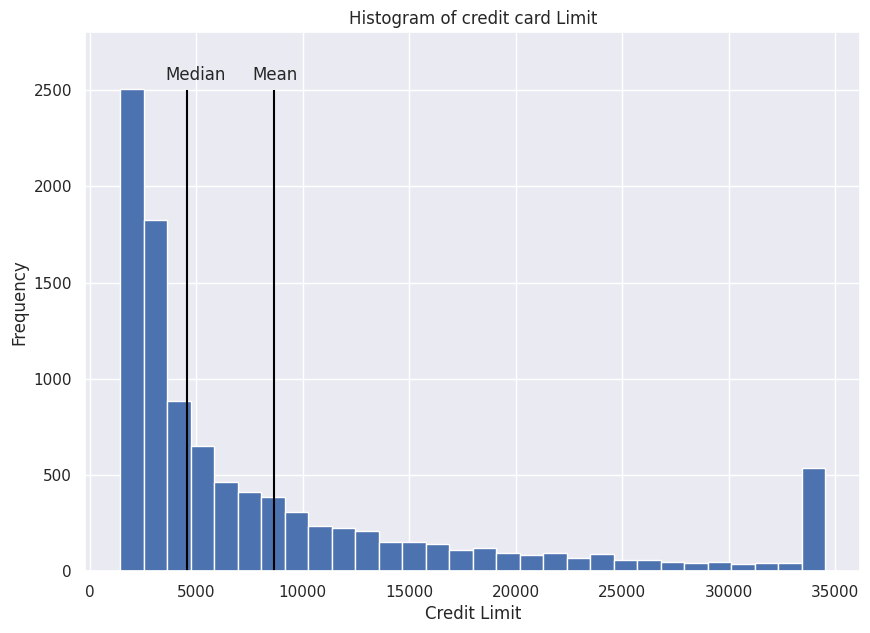

In [58]:
plt.hist(data['Credit_Limit'])
plt.vlines(data['Credit_Limit'].mean(),0,5000)
plt.vlines(data['Credit_Limit'].median(),0,5000)

#mean and median are different but it could not be visible in above plot, hence needs modifications

plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins = 30)
plt.vlines(data['Credit_Limit'].mean(),0,2500,colors = 'Black')
plt.vlines(data['Credit_Limit'].median(),0,2500, colors = 'Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50,"Mean")
plt.text(data['Credit_Limit'].median()-1000, 2500+50,"Median")
plt.ylim(0,2800)
plt.title("Histogram of credit card Limit")
plt.ylabel("Frequency")
plt.xlabel('Credit Limit')

# hence data is skewed to the right - mean > median

Text(0.5, 0, 'Total transaction amount')

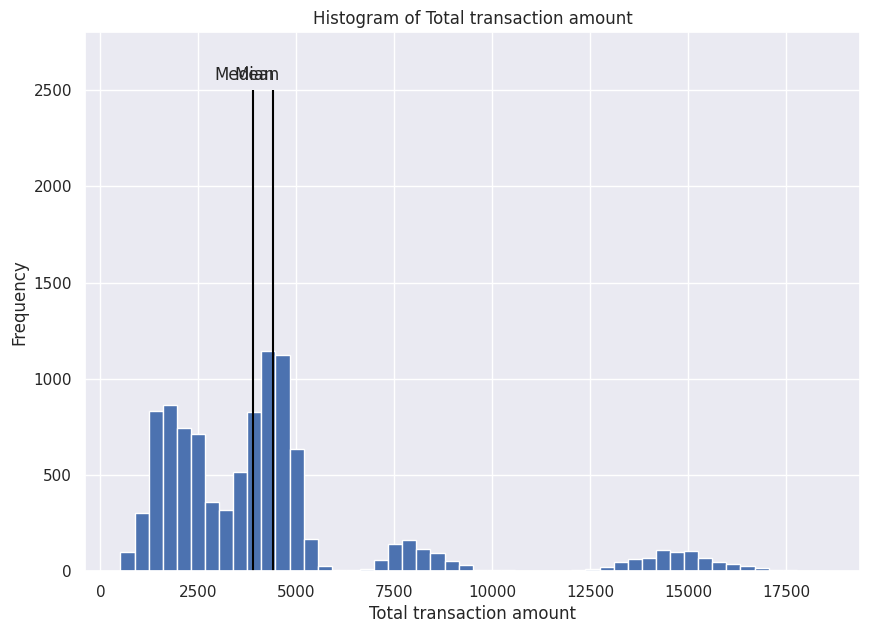

In [59]:
plt.figure(figsize=(10,7))
plt.hist(data['Total_Trans_Amt'], bins = 50) #default bins are 10
plt.vlines(data['Total_Trans_Amt'].mean(),0,2500,colors = 'Black')
plt.vlines(data['Total_Trans_Amt'].median(),0,2500, colors = 'Black')
plt.text(data['Total_Trans_Amt'].mean()-1000, 2500+50,"Mean")
plt.text(data['Total_Trans_Amt'].median()-1000, 2500+50,"Median")
plt.ylim(0,2800)
plt.title("Histogram of Total transaction amount")
plt.ylabel("Frequency")
plt.xlabel('Total transaction amount')

# this data is also right skewed

DATA TRANSFORMATION : Normalisation(min-max scaler - between 0 and 1) and Log(less skewed) to remove skewness

In [60]:
def normalise(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper - lower)
    return y

In [61]:
data['credit_limit_normalised'] = normalise(data['Credit_Limit'])
data['credit_limit_logtransformed'] = np.log(data['Credit_Limit'])

<Axes: xlabel='credit_limit_logtransformed', ylabel='Count'>

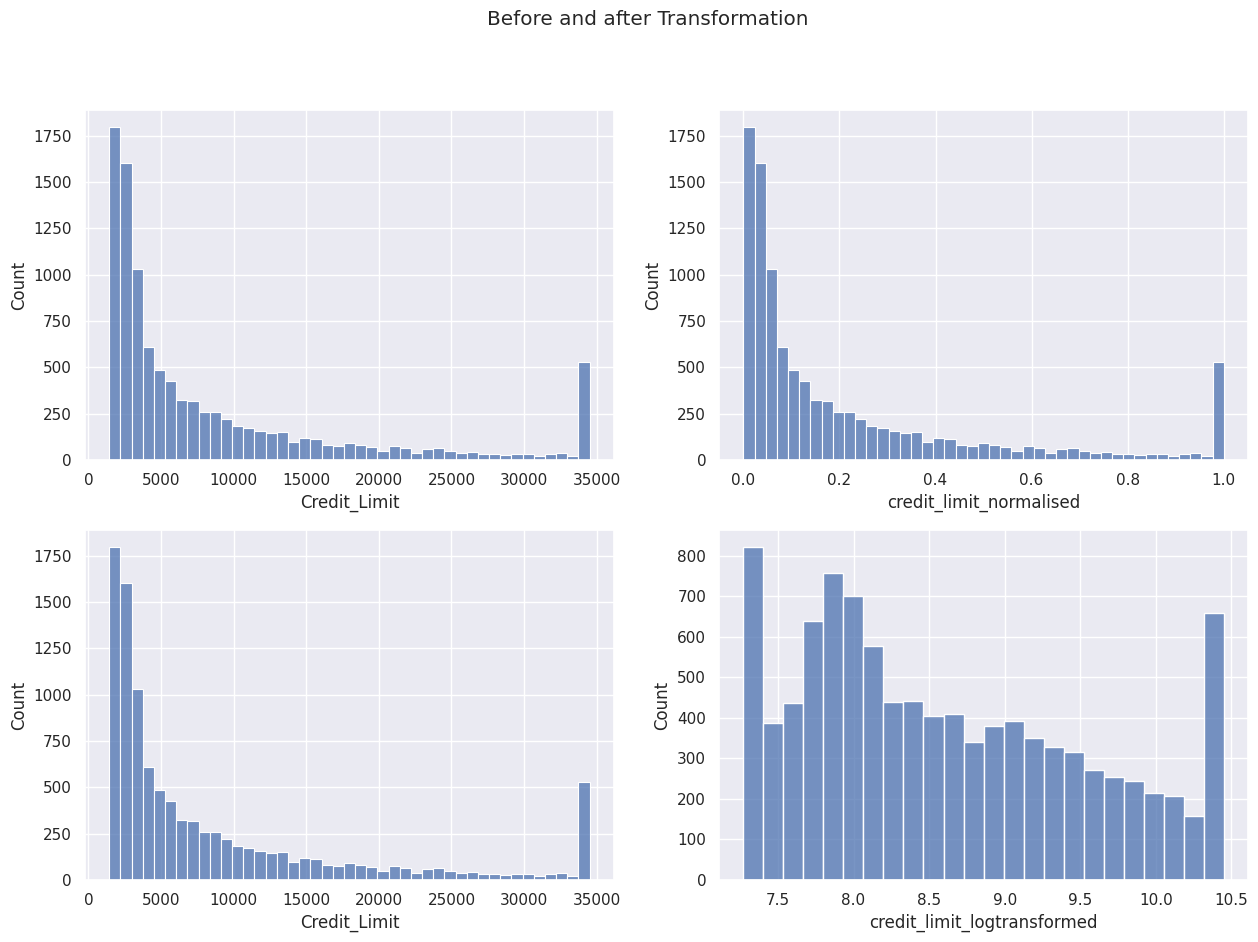

In [62]:
#subplot code
fig,axes = plt.subplots(2,2,figsize =[15,10])
fig.suptitle('Before and after Transformation')

#create boxplot in each subplot
sns.histplot(data, x= "Credit_Limit",ax = axes[0,0])
sns.histplot(data, x = "credit_limit_normalised",ax = axes[0,1] )
sns.histplot(data, x= "Credit_Limit",ax = axes[1,0])
sns.histplot(data, x= "credit_limit_logtransformed",ax = axes[1,1])


<Axes: xlabel='Gender', ylabel='Total_Trans_Ct'>

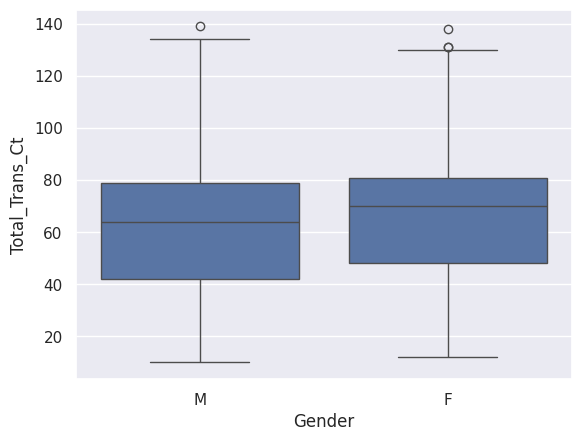

In [63]:
#other distributions include box plots, whisker plots and pyramids
sns.boxplot(data, x = data['Gender'], y = data['Total_Trans_Ct'])

DATA VISUALISATION # NOT DISTRIBUTION OR FREQUENCY CHECKING

In [64]:
data.dtypes

CLIENTNUM                         int64
Attrition_Flag                   object
Customer_Age                      int64
Gender                           object
Dependent_count                   int64
Education_Level                  object
Marital_Status                   object
Income_Category                  object
Card_Category                    object
Months_on_book                    int64
Total_Relationship_Count          int64
Months_Inactive_12_mon            int64
Contacts_Count_12_mon             int64
Credit_Limit                    float64
Total_Revolving_Bal               int64
Avg_Open_To_Buy                 float64
Total_Amt_Chng_Q4_Q1            float64
Total_Trans_Amt                   int64
Total_Trans_Ct                    int64
Total_Ct_Chng_Q4_Q1             float64
Avg_Utilization_Ratio           float64
Customer_age_bins              category
credit_limit_normalised         float64
credit_limit_logtransformed     float64
dtype: object

<Axes: xlabel='Customer_age_bins', ylabel='Credit_Limit'>

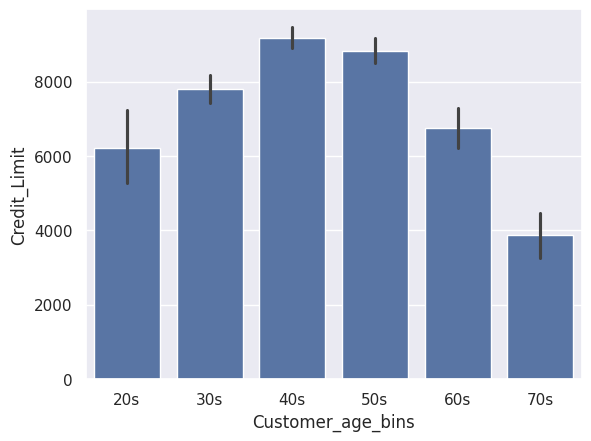

In [65]:
sns.barplot( x= "Customer_age_bins", y ="Credit_Limit", data = data, estimator = np.mean)

#error bars length show the mean value range

<Axes: xlabel='Customer_age_bins', ylabel='Credit_Limit'>

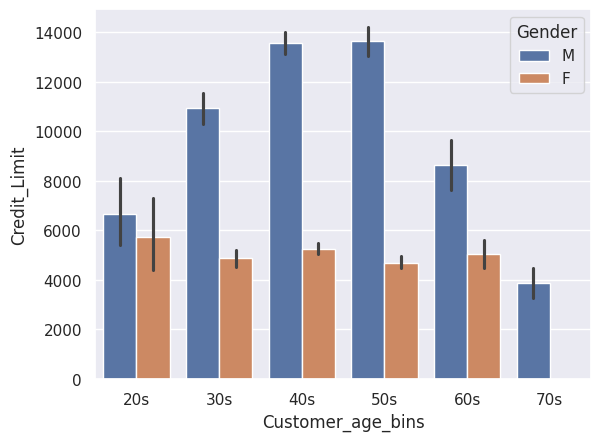

In [66]:
sns.barplot( x= "Customer_age_bins", y ="Credit_Limit", hue = "Gender",data = data, estimator = np.mean)

<Axes: xlabel='Customer_age_bins', ylabel='Credit_Limit'>

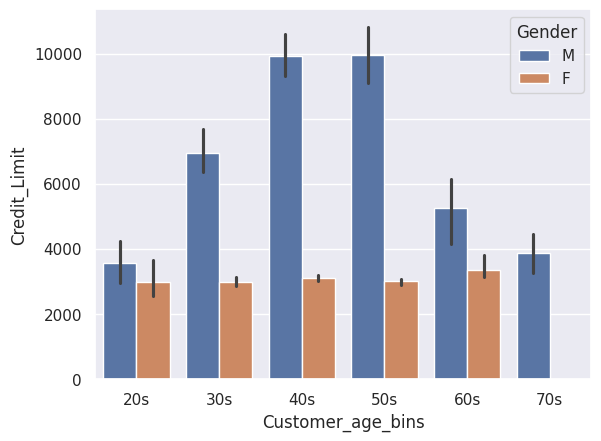

In [67]:
sns.barplot( x= "Customer_age_bins", y ="Credit_Limit", hue = "Gender",data = data, estimator = np.median)

In [68]:
barplot = data.groupby(['Customer_age_bins','Gender'])["Credit_Limit"].mean().reset_index()
barplot

/tmp/ipykernel_829/2207015008.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_age_bins,Gender,Credit_Limit
0,20s,F,5731.101075
1,20s,M,6649.367647
2,30s,F,4867.775314
3,30s,M,10948.605311
4,40s,F,5270.821784
5,40s,M,13557.484844
6,50s,F,4702.649475
7,50s,M,13635.717041
8,60s,F,5053.412857
9,60s,M,8626.832000


<Axes: xlabel='Customer_age_bins', ylabel='Credit_Limit'>

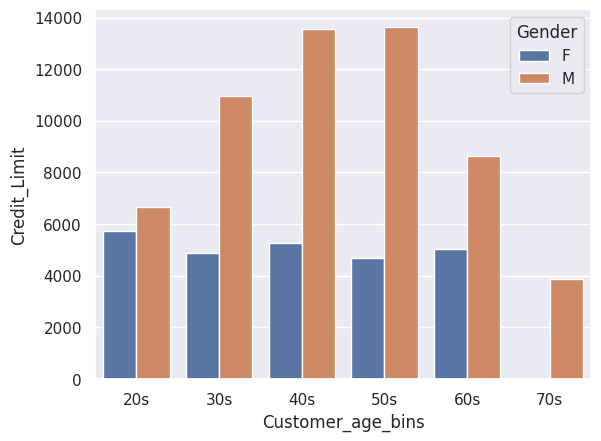

In [69]:
sns.barplot( x= "Customer_age_bins", y ="Credit_Limit", hue = "Gender",data = barplot, estimator = np.median)

<Axes: xlabel='Credit_Limit', ylabel='Customer_age_bins'>

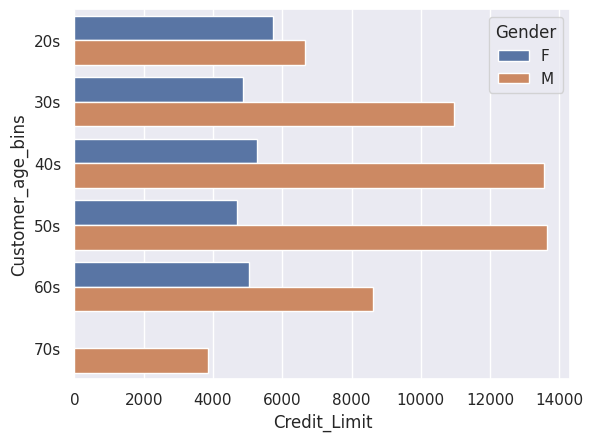

In [70]:
#for horizontal clustered bar chart
sns.barplot( x ="Credit_Limit",y= "Customer_age_bins", hue = "Gender",data = barplot, estimator = np.median, orient ='h')

In [71]:
#lollipo chart when the height difference is too small to tell, i.e sorting the chart
lollipop = data.groupby(['Customer_age_bins'])["Credit_Limit"].mean().reset_index().sort_values('Credit_Limit')
lollipop


/tmp/ipykernel_829/394259005.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Customer_age_bins,Credit_Limit
5,70s,3860.500000
0,20s,6211.425128
4,60s,6738.987925
1,30s,7790.933677
3,50s,8811.622181
2,40s,9178.870949


<StemContainer object of 3 artists>

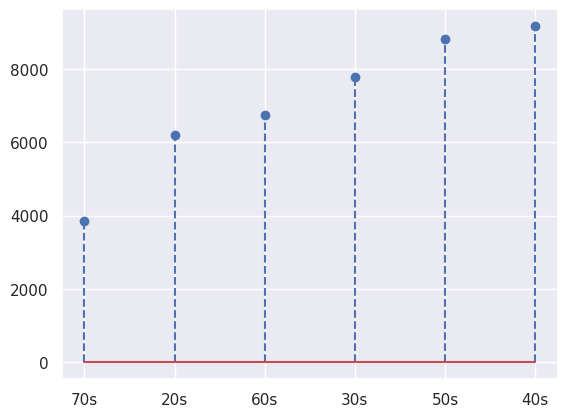

In [72]:
plt.stem(lollipop['Customer_age_bins'], lollipop['Credit_Limit'],linefmt = '--')

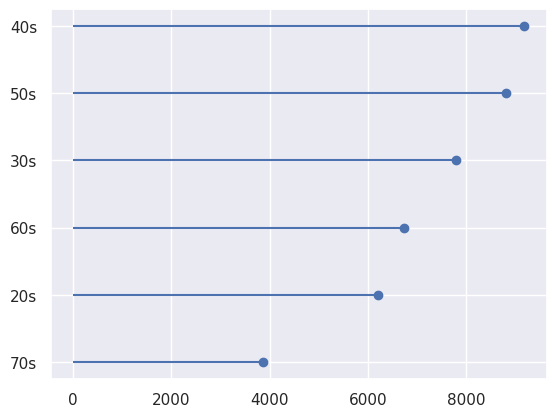

In [73]:
fig,ax = plt.subplots()
ax.hlines(lollipop['Customer_age_bins'], xmin=0,xmax =lollipop['Credit_Limit'])
ax.plot(lollipop['Credit_Limit'],lollipop['Customer_age_bins'],"o")

#pivot tables in pythin and group by are different
DATA TABLES

In [74]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Customer_age_bins', 'credit_limit_normalised',
       'credit_limit_logtransformed'],
      dtype='object')

In [75]:
data.groupby(['Attrition_Flag']).agg({'CLIENTNUM':'nunique',
                                      'Customer_Age':'mean', 
                                      'Gender':'mean',
                                    'Dependent_count':'mean',
                                      'Education_Level':'mean', 
                                      'Marital_Status':'mean',
       'Income_Category':'mean', 
       'Card_Category':'mean', 
       'Months_on_book':'mean',
       'Total_Relationship_Count':'mean',
         'Months_Inactive_12_mon':'mean',
       'Contacts_Count_12_mon':'mean',
         'Credit_Limit':'mean',
           'Total_Revolving_Bal':'mean',
       'Avg_Open_To_Buy':'mean',
         'Total_Amt_Chng_Q4_Q1':'mean', 
         'Total_Trans_Amt':'mean',
       'Total_Trans_Ct':'mean',
         'Total_Ct_Chng_Q4_Q1':'mean', 
         'Avg_Utilization_Ratio':'mean'

}).T

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
#once you get the table of avg data for attrition and existing customers, difference to be calculated and sort the same to understand
# the parameters that are significantly effecting the attrition on average

DATA VISUALISATION - RELATIONSHIPS

In [ ]:
#GET NUMERIC DATA AND DO PAIR PLOT
numeric_data = data.select_dtypes(include=['number'])

In [ ]:
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'credit_limit_normalised', 'credit_limit_logtransformed'],
      dtype='object')

In [ ]:
num_data = data._get_numeric_data()
num_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'credit_limit_normalised', 'credit_limit_logtransformed'],
      dtype='object')

In [76]:
num_data = data[['Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Attrition_Flag']]

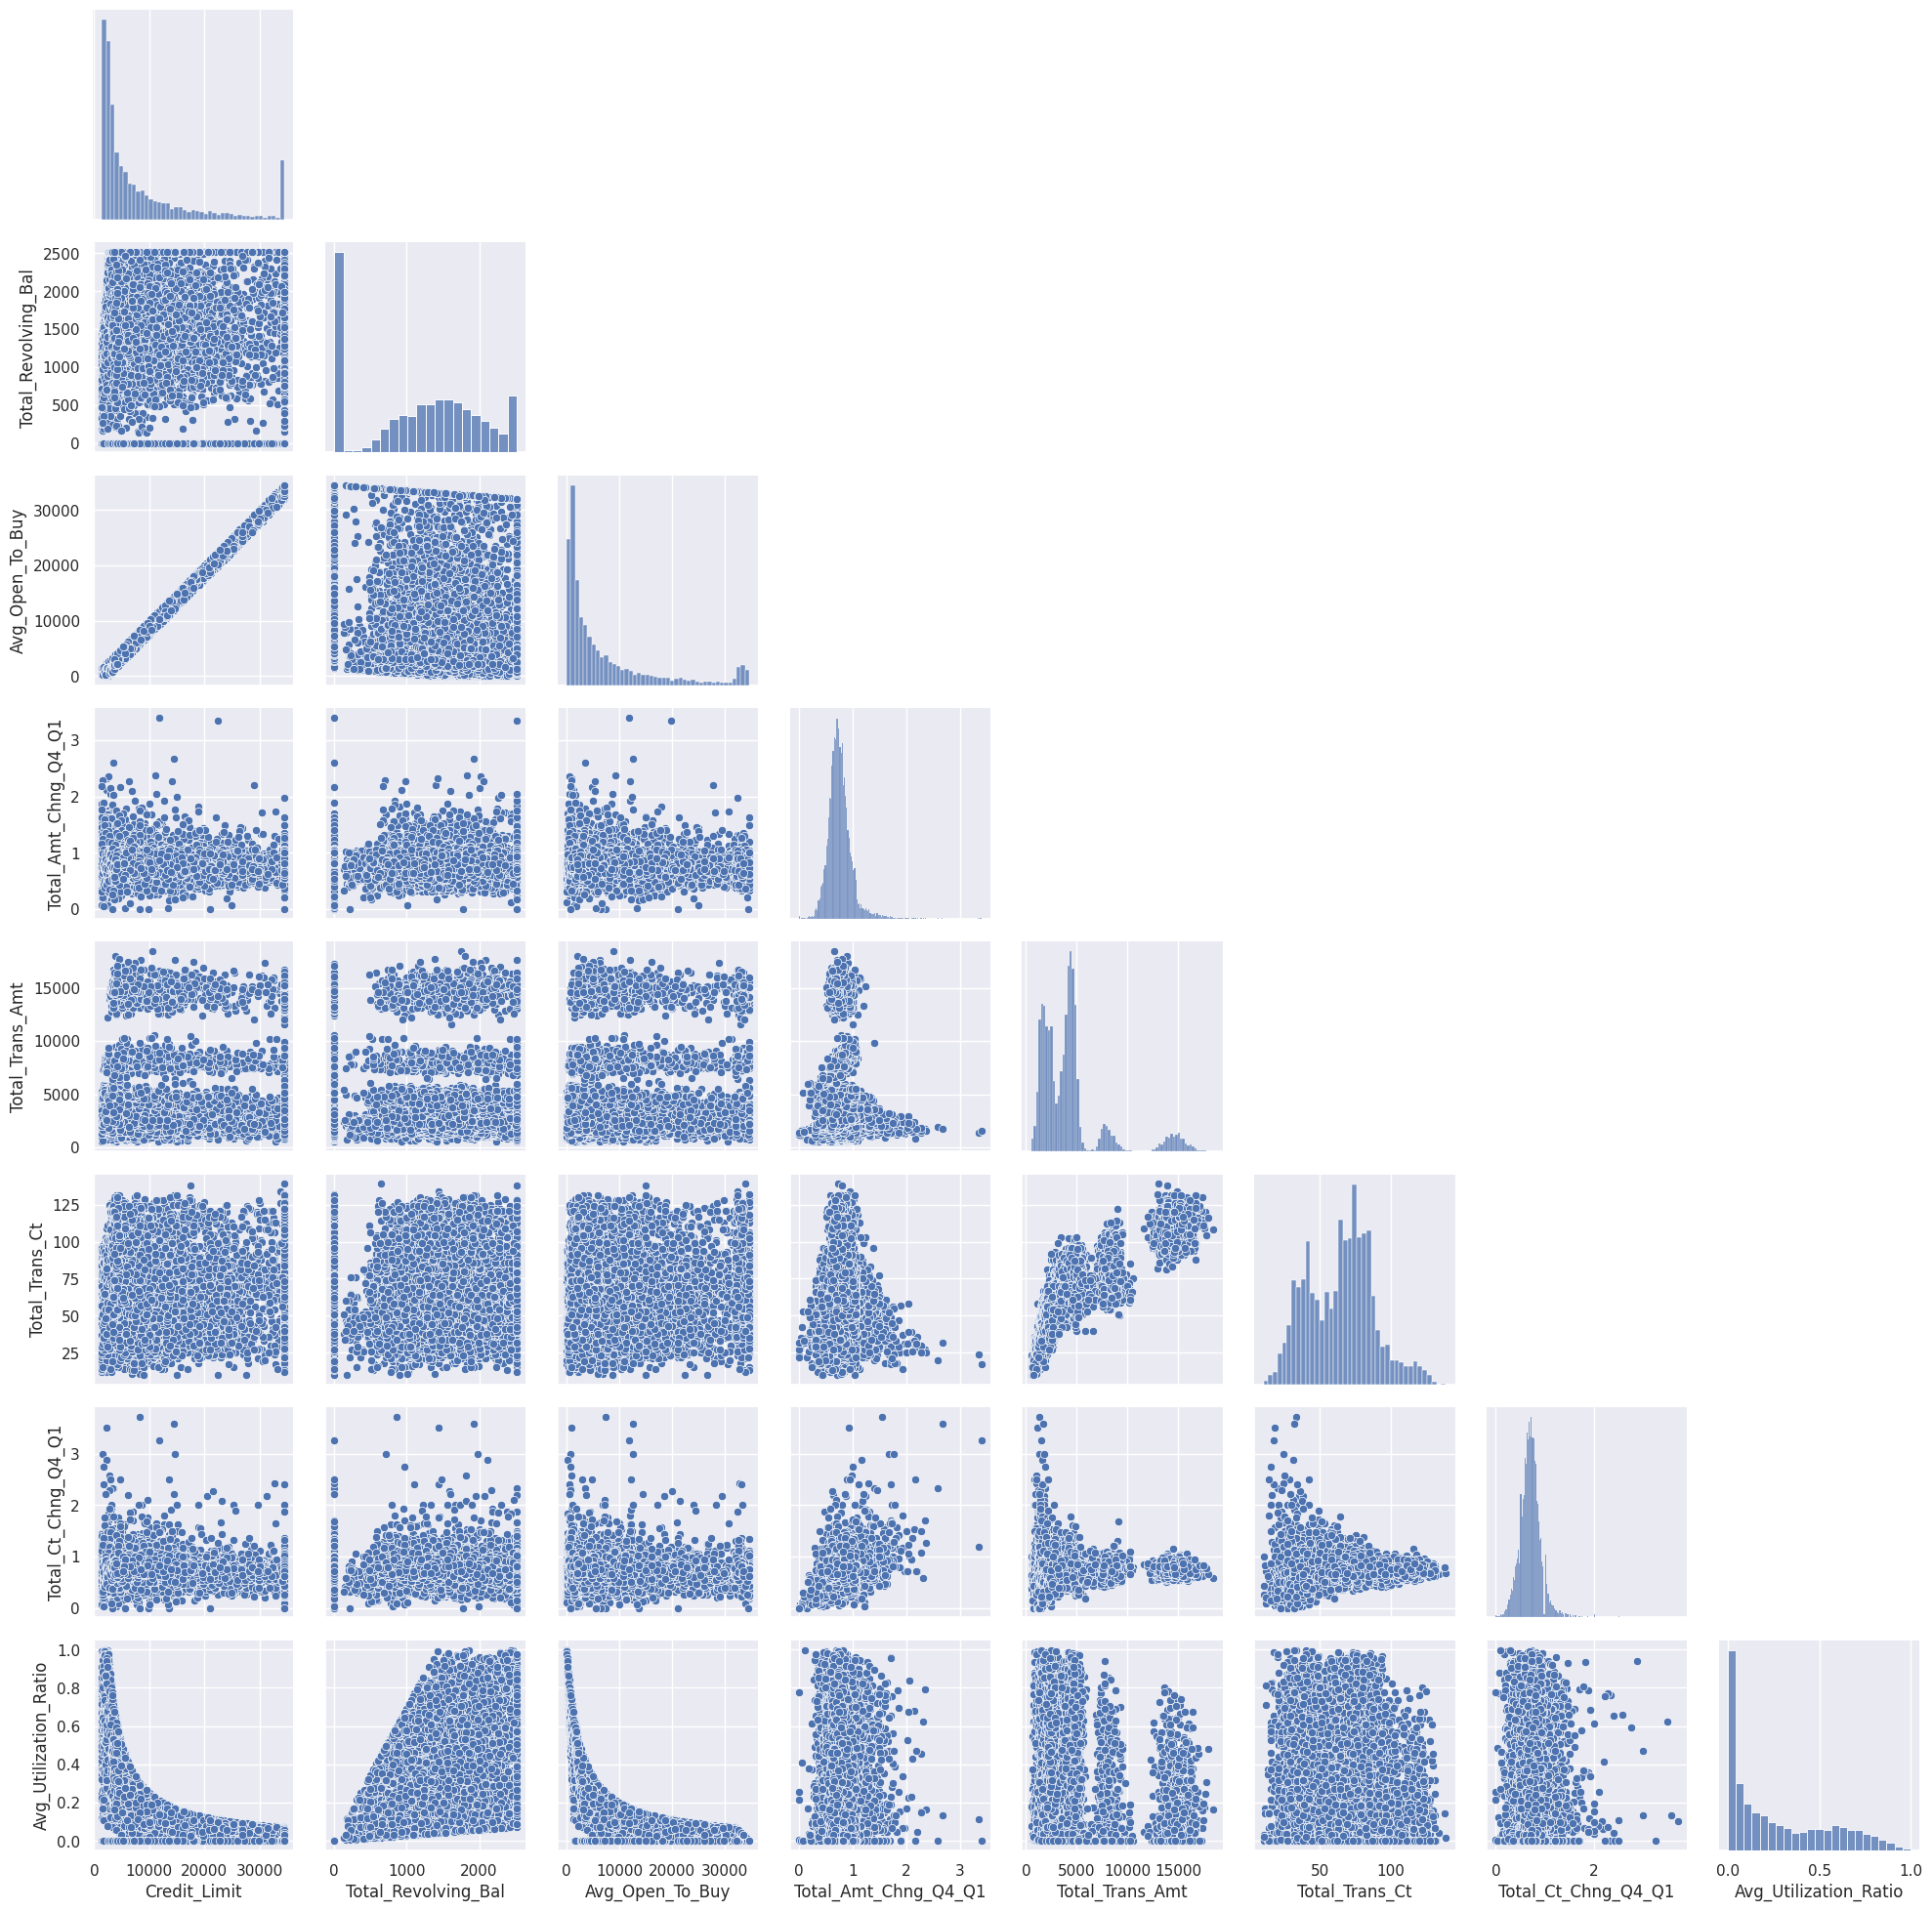

In [77]:
g = sns.PairGrid(num_data,diag_sharey = False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

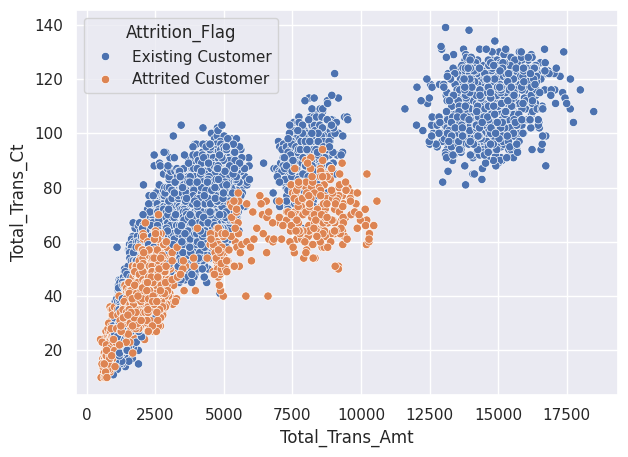

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot( x = 'Total_Trans_Amt', y = 'Total_Trans_Ct', hue ='Attrition_Flag',data = num_data)

#FINDING 1 : Customers with more than 11K transaction amount has zero attrition

In [ ]:
num_data.columns


Index(['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag'],
      dtype='object')

<Axes: xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Total_Trans_Amt'>

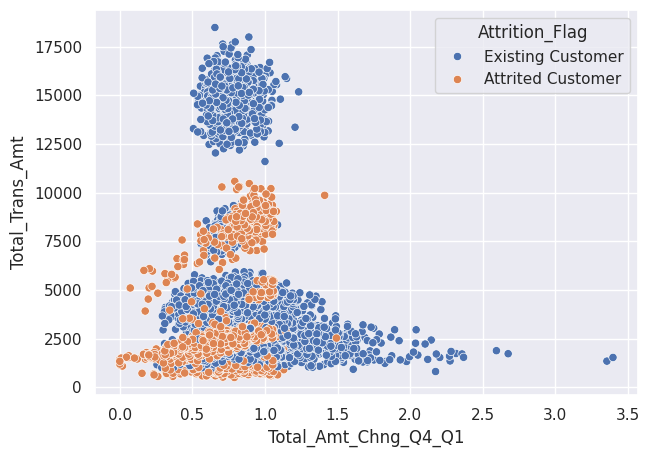

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot( x = 'Total_Amt_Chng_Q4_Q1', y = 'Total_Trans_Amt', hue ='Attrition_Flag',data = num_data)

#FINDING 1 : Customers with more than 11K transaction amount has zero attrition
#Finding 2: The cutsomers with Total_Amt_change_Q4_Q1 > 1.5 are not attrited
#Finding 3: The total transaction count > 100 are not attrited
#Finding 4:The total transaction amt > 12.5K are less attrited


In [ ]:
#Ridge Plot
bins = [0,11000,900000]
labels =['LTA', 'HTA']
data["Total_Trans_Amt_bins"] = pd.cut(data['Total_Trans_Amt'],bins =bins,labels =labels)


In [ ]:
data.groupby(['Total_Trans_Amt_bins','Attrition_Flag']).agg({'CLIENTNUM':'nunique',
         'Credit_Limit':'mean',
           'Total_Revolving_Bal':'mean',
       'Avg_Open_To_Buy':'mean',
         'Total_Amt_Chng_Q4_Q1':'mean', 
         'Total_Trans_Amt':'mean',
       'Total_Trans_Ct':'mean',
         'Total_Ct_Chng_Q4_Q1':'mean', 
         'Avg_Utilization_Ratio':'mean'

}).T


/tmp/ipykernel_1439/1108138361.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Total_Trans_Amt_bins                LTA                                 HTA  \
Attrition_Flag        Attrited Customer Existing Customer Attrited Customer   
CLIENTNUM                   1627.000000       7753.000000               0.0   
Credit_Limit                8136.039459       8213.629808               NaN   
Total_Revolving_Bal          672.822987       1245.908165               NaN   
Avg_Open_To_Buy             7463.216472       6967.721643               NaN   
Total_Amt_Chng_Q4_Q1           0.694277          0.772248               NaN   
Total_Trans_Amt             3095.025814       3686.943506               NaN   
Total_Trans_Ct                44.933620         64.658326               NaN   
Total_Ct_Chng_Q4_Q1            0.554386          0.741687               NaN   
Avg_Utilization_Ratio          0.162475          0.307600               NaN   

Total_Trans_Amt_bins                     
Attrition_Flag        Existing Customer  
CLIENTNUM                    747.000000  
Credit_Limit               14053.797858  
Total_Revolving_Bal         1367.615797  
Avg_Open_To_Buy            12686.182062  
Total_Amt_Chng_Q4_Q1           0.775229  
Total_Trans_Amt            14698.396252  
Total_Trans_Ct               110.336011  
Total_Ct_Chng_Q4_Q1            0.750190  
Avg_Utilization_Ratio          0.180288

In [ ]:
# Total_Revolving_Bal is still a good indicator 
# Avg_Utilisation_ratio is not a good indicator as attrited and existing have similar values
# Total transaction count is a good indicator
# Total transaction amount not good anymore as attrited and existing have similar values

(0.0, 2.0)

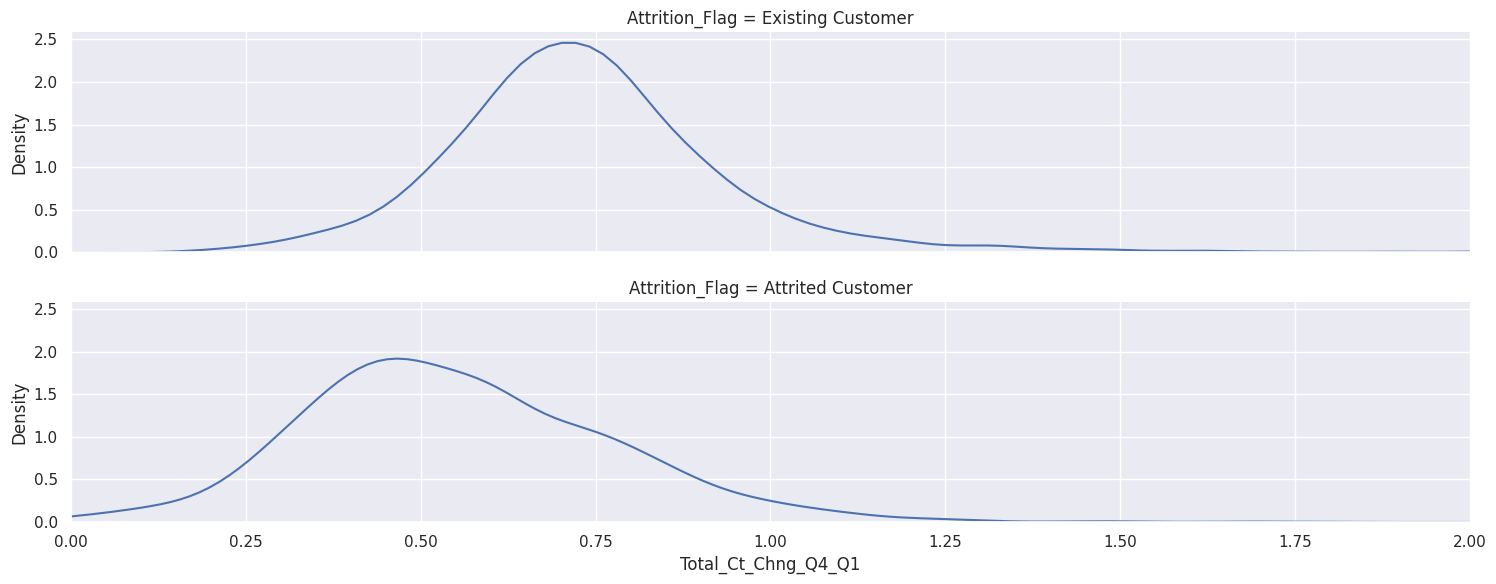

In [ ]:
g = sns.FacetGrid(data, row ='Attrition_Flag', aspect = 5, height =3)
g.map_dataframe(sns.kdeplot, x ='Total_Ct_Chng_Q4_Q1')
plt.xlim(0,2)

PUTTING IT TO ALL TOGETHER


Text(12500, 40, 'No churned customers above $11K of spending')

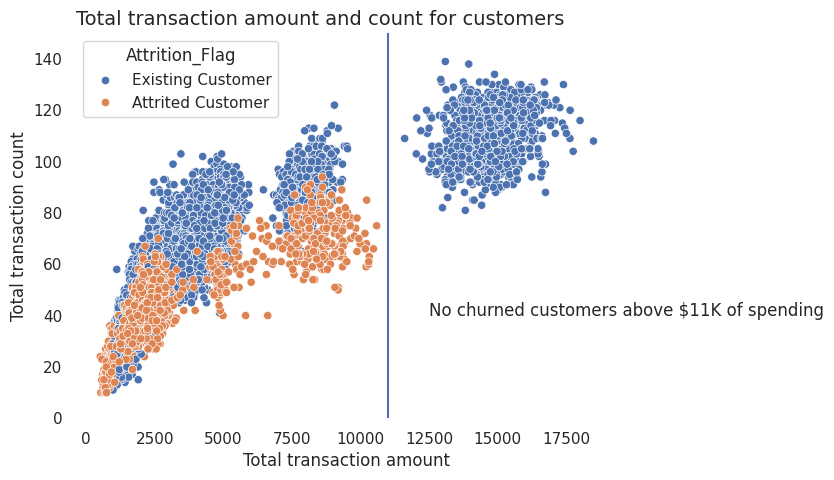

In [79]:
sns.set_theme(style= 'white')
plt.figure(figsize=(7,5))
sns.scatterplot( x = 'Total_Trans_Amt', y = 'Total_Trans_Ct', hue ='Attrition_Flag',data = num_data)
sns.despine(bottom = True, left= True) #removes border of scatter plot
plt.ylim(0,150) #changes y axis limits
plt.xlabel("Total transaction amount")
plt.ylabel("Total transaction count")
plt.title("Total transaction amount and count for customers", loc = 'left', size = 14)
plt.vlines(11000,0,150) # adds line at 11k
plt.text(12500,40,"No churned customers above $11K of spending")

# Ridge plot from KDE plots

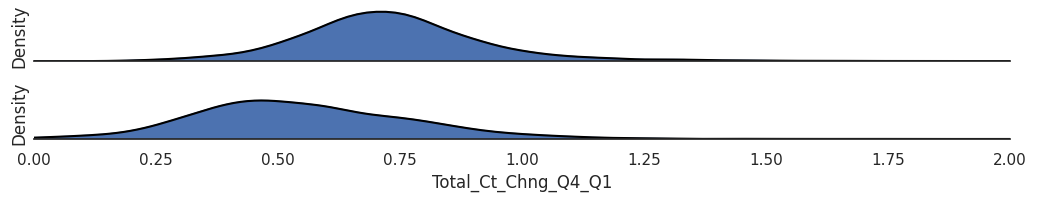

In [81]:
g = sns.FacetGrid(data, row ='Attrition_Flag', aspect = 9, height =1.2)
g.map_dataframe(sns.kdeplot, x ='Total_Ct_Chng_Q4_Q1', fill = True, alpha=1)
g.map_dataframe(sns.kdeplot, x ='Total_Ct_Chng_Q4_Q1', color = "Black")
g.fig.subplots_adjust(hspace = 0.5)
plt.xlim(0,2)
g.set_titles("")
g.set(yticks =[])
g.despine(left = True)